# Data Preparation and Cleaning


In [1]:
#Data Preparation and Cleaning
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load dataset
df = pd.read_csv("netflix_titles.csv")
pd.set_option('display.max_columns', None)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [4]:
df.shape

(7787, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_df_copy = df.copy()
netflix_df_copy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [8]:
netflix_df_copy.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
netflix_df_copy.drop(['director', 'cast', 'date_added'], axis=1, inplace=True)
netflix_df_copy.shape

(7787, 9)

In [10]:
netflix_df_copy.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
netflix_df_copy['country'].value_counts()

United States                           2555
India                                    923
United Kingdom                           397
Japan                                    226
South Korea                              183
                                        ... 
France, Canada, China, Cambodia            1
South Africa, Angola                       1
Egypt, Austria, United States              1
France, Canada, United States              1
United Kingdom, United States, Japan       1
Name: country, Length: 681, dtype: int64

In [12]:
netflix_df_copy['country'].replace(np.nan, 'United States', inplace=True)

In [13]:
netflix_df_copy['country'].isnull().sum()

0

In [14]:
netflix_df_copy['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [15]:
netflix_df_copy['rating'].replace(np.nan, 'TV-MA', inplace=True)

In [16]:
netflix_df_copy['rating'].value_counts()

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [17]:
netflix_df_copy.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
netflix_df_copy

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,United States,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# Exploratory Analysis and Visualization
We will now visualize the above data into various graphs and charts for a better understanding.

Ratings of Movies and Shows

c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\pc world\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

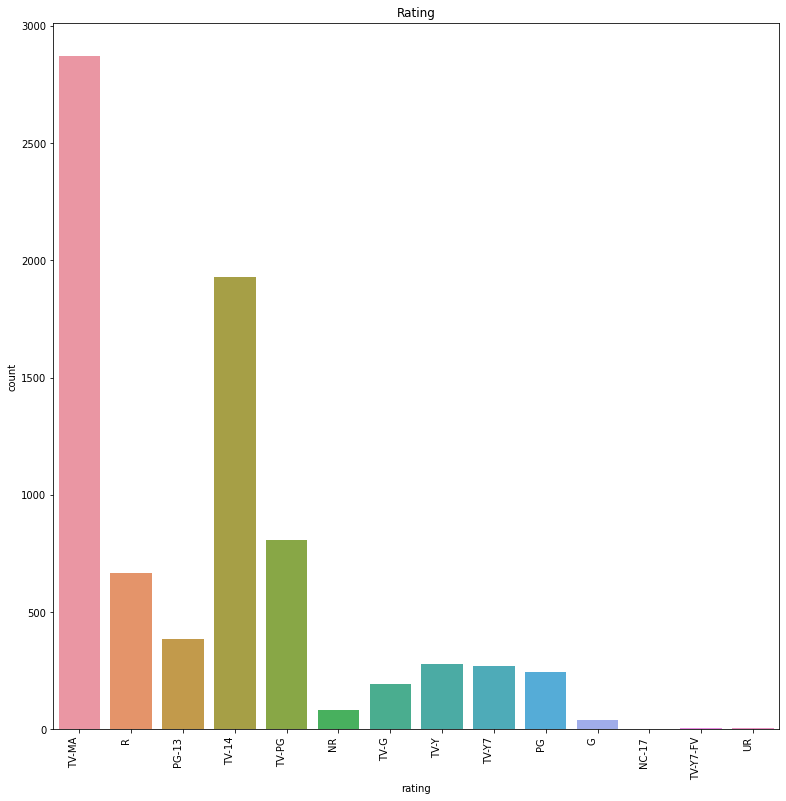

In [19]:
sns.countplot(netflix_df_copy['rating'])
sns.countplot(netflix_df_copy['rating']).set_xticklabels(sns.countplot(netflix_df_copy['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating');

# Relation between Type and Rating of Movies and Shows

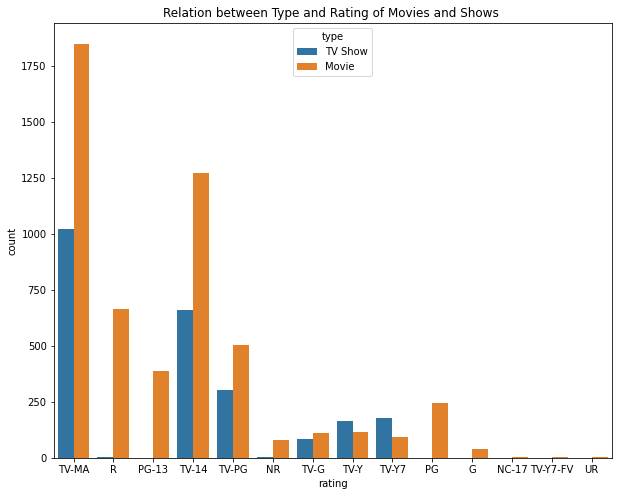

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix_df_copy)
plt.title('Relation between Type and Rating of Movies and Shows ')
plt.show();

# Relation between Movies and TV Shows

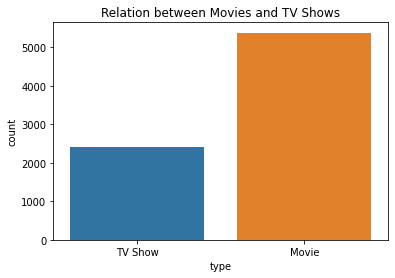

In [21]:
sns.countplot(x = netflix_df_copy['type'])
fig.set_size_inches(10,10)
plt.title('Relation between Movies and TV Shows');

# Q1:Which country has the most number of titles produced?


In [22]:
country_vs_title = netflix_df_copy[['country', 'title']]
country_vs_title

,country,title
0,Brazil,3%
1,Mexico,7:19
2,Singapore,23:59
3,United States,9
4,United States,21
...,...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar...",Zozo
7783,India,Zubaan
7784,United States,Zulu Man in Japan
7785,Australia,Zumbo's Just Desserts


In [39]:
netflix_df_copy['country'].value_counts()

United States                           3062
India                                    923
United Kingdom                           397
Japan                                    226
South Korea                              183
                                        ... 
France, Canada, China, Cambodia            1
South Africa, Angola                       1
Egypt, Austria, United States              1
France, Canada, United States              1
United Kingdom, United States, Japan       1
Name: country, Length: 681, dtype: int64

In [43]:
netflix_df_copy['country'].replace('United States,', 'United States', inplace=True)

In [44]:
netflix_df_copy['country'].value_counts()

United States                           3063
India                                    923
United Kingdom                           397
Japan                                    226
South Korea                              183
                                        ... 
France, Canada, China, Cambodia            1
South Africa, Angola                       1
Egypt, Austria, United States              1
France, Canada, United States              1
United Kingdom, United States, Japan       1
Name: country, Length: 680, dtype: int64

In [47]:
top5_titles = country_vs_title.groupby('country').count().sort_values('title', ascending=False)
top5_titles = top5_titles.head(10)
top5_titles


,title
country,
United States,3062
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101


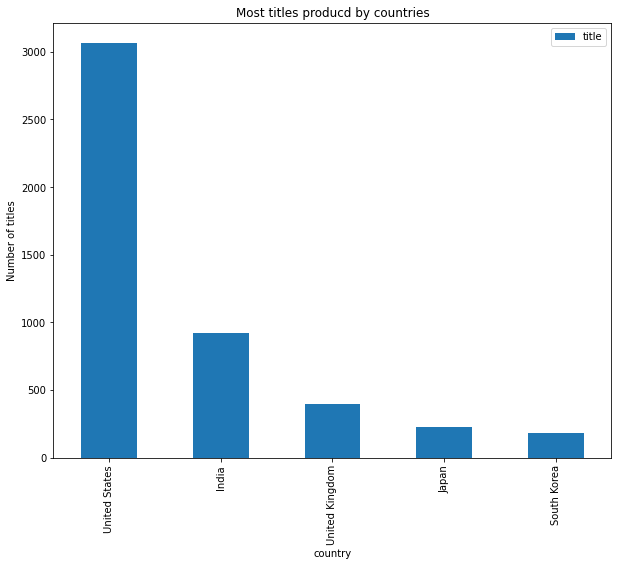

In [25]:
top5_titles.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of titles')
plt.title('Most titles producd by countries')
plt.show()


Hence, United States produced the most number of titles

# Q2:Does Netflix have more Movies or TV Shows?

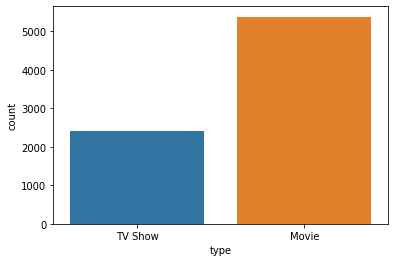

In [26]:
sns.countplot(x='type', data=netflix_df_copy);

# Q3 What are the top 5 most popular ratings on Netflix?

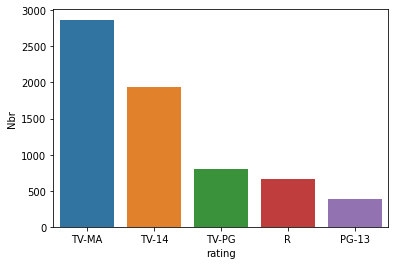

In [27]:
netflix_df_copy_rating = netflix_df_copy['rating'].value_counts()
netflix_df_copy_rating = pd.DataFrame(netflix_df_copy_rating).reset_index()
netflix_df_copy_rating.columns = ['rating','Nbr']
sns.barplot(x = 'rating',y = 'Nbr', data=netflix_df_copy_rating.head(5));

Hence, we saw TV-MA, TV-14 and TV-PG, R, PG-13 are the five msot popular Ratings among all of them.


# Q4 Which were the top 5 years in number of titles released?


In [28]:
top_5_year = netflix_df_copy.groupby('release_year').count().sort_values('title',ascending=False).head(5)

top_5_year.reset_index(inplace=True)
top_5_year

,release_year,show_id,type,title,country,rating,duration,listed_in,description
0,2018,1121,1121,1121,1121,1121,1121,1121,1121
1,2017,1012,1012,1012,1012,1012,1012,1012,1012
2,2019,996,996,996,996,996,996,996,996
3,2016,882,882,882,882,882,882,882,882
4,2020,868,868,868,868,868,868,868,868


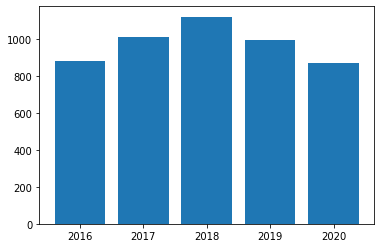

In [29]:
plt.bar(top_5_year.release_year,top_5_year.title);

# Conclusion

We concluded many results throught the analysis like-

1. Netflix has more number of Movies than TV Shows.
2. Netflix has the most number of Titles released in the year 2018.
We got to know the top 5 most popular ratings, top 5 countries producing most number of titles, top 5 year when Netflix produced most number of Titles and also the 5 least popular genre on Netflix.

In [30]:
netflix_df_copy.to_csv('netflix_data_analysis.csv')
